# VeggieVista- Vegetable Store Sales Analysis Project

# Introduction
This report presents the findings of an exploratory data analysis (EDA) on the vegetable store's sales dataset over a three-month period. The analysis answers several key questions to uncover insights into the store's operations, profitability, and sales dynamics.

### Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import scipy.stats as st
import statsmodels.api as sm
import seaborn as sns 
from scipy.stats import pearsonr
import warnings 
warnings.filterwarnings('ignore')

### Loading Dataset

In [2]:
df = pd.read_csv('Desktop/VeggieVista.csv')

In [3]:
df

,DATE,PRODUCT_NAME,BUYING_RATE(per kg),QUANTITY(kgs),SELLING_PRICE(per kg),SOLD_QUANTITY,TOTAL_SALES(Current day),FRESHNESS_DURATION,REMAINING_QUANTITY_CURR,TOTAL_AVAILABLE_QUANTITY,RQ_SELLING_PRICE,RQ_SOLD_QUANTITY,RQ_TOTAL_SALE(D-2),REMAINING_WASTE_QUANTITY,QUANTITY_WASTE_PRICE,PROFIT_LOSS_TOTAL
0,2023-01-01,Tomato,70,1000,90,700,63000,2-3 days,300,1000,0,0,0,0,0,63000
1,2023-01-02,Tomato,70,1000,90,900,81000,2-3 days,100,1300,90,300,27000,0,0,108000
2,2023-01-03,Tomato,70,1000,90,600,54000,2-3 days,400,1100,90,100,9000,0,0,63000
3,2023-01-04,Tomato,70,200,90,200,18000,2-3 days,0,600,80,400,32000,0,0,50000
4,2023-01-05,Tomato,70,300,100,300,30000,2-3 days,0,300,0,0,0,0,0,30000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,2023-02-20,Cucumber,40,1000,60,1000,60000,2-3 days,0,1200,50,200,10000,0,0,70000
569,2023-02-21,Cucumber,50,1000,60,1000,60000,2-3 days,0,1000,0,0,0,0,0,60000
570,2023-02-22,Cucumber,50,1000,60,1000,60000,2-3 days,0,1000,0,0,0,0,0,60000
571,2023-02-23,Cucumber,50,1000,70,1000,70000,2-3 days,0,1000,0,0,0,0,0,70000


### Basic Information

In [15]:
df.info() # To gain an initial understanding of the dataset, including the number of entries, column names,
          # data types, and the presence of any missing values, we use the df.info() function.
          # This step is crucial for identifying potential issues in the dataset that need 
          # to be addressed during the data cleaning process.

<class 'pandas.core.frame.DataFrame'>
Index: 360 entries, 0 to 359
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATE                      360 non-null    datetime64[ns]
 1   PRODUCT_NAME              360 non-null    category      
 2   BUYING_RATE(per kg)       360 non-null    int64         
 3   QUANTITY(kgs)             360 non-null    int64         
 4   SELLING_PRICE(per kg)     360 non-null    int64         
 5   SOLD_QUANTITY             360 non-null    int64         
 6   TOTAL_SALES(Current day)  360 non-null    int64         
 7   FRESHNESS_DURATION        360 non-null    object        
 8   REMAINING_QUANTITY_CURR   360 non-null    int64         
 9   TOTAL_AVAILABLE_QUANTITY  360 non-null    int64         
 10  RQ_SELLING_PRICE          360 non-null    int64         
 11  RQ_SOLD_QUANTITY          360 non-null    int64         
 12  RQ_TOTAL_SALE(D-2)        3

In [17]:
df.shape # To understand the dimensions of the dataset, including the number of rows and columns,
         # we use the df.shape attribute. This step is important for getting a quick overview of the dataset size 
         # and structure before diving deeper into the data cleaning and analysis process.

(360, 16)

In [18]:
df.describe()  #df.describe() is a pandas DataFrame method that generates descriptive statistics of the DataFrame's
               #numerical columns. It provides information such as count, mean, standard deviation, minimum,
               #25th percentile, 50th percentile (median), 75th percentile, and maximum values. 
               #This function is useful for quickly understanding the distribution and summary statistics of the data 
               #in a DataFrame.

,DATE,BUYING_RATE(per kg),QUANTITY(kgs),SELLING_PRICE(per kg),SOLD_QUANTITY,TOTAL_SALES(Current day),REMAINING_QUANTITY_CURR,TOTAL_AVAILABLE_QUANTITY,RQ_SELLING_PRICE,RQ_SOLD_QUANTITY,RQ_TOTAL_SALE(D-2),REMAINING_WASTE_QUANTITY,QUANTITY_WASTE_PRICE,PROFIT_LOSS_TOTAL
count,360,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000
mean,2023-02-14 12:00:00,84.111111,711.166667,101.180556,649.138889,39414.444444,62.027778,763.666667,12.625000,39.027778,1891.944444,23.000000,1507.777778,39798.611111
min,2023-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-10000.000000
25%,2023-01-23 00:00:00,40.000000,80.000000,50.000000,80.000000,12000.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10900.000000
50%,2023-02-14 12:00:00,50.000000,500.000000,70.000000,400.000000,30750.000000,0.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34000.000000
75%,2023-03-09 00:00:00,130.000000,1200.000000,150.000000,1000.000000,63000.000000,100.000000,1400.000000,0.000000,0.000000,0.000000,5.250000,670.000000,68500.000000
max,2023-03-31 00:00:00,250.000000,2200.000000,280.000000,2000.000000,120000.000000,1000.000000,2500.000000,140.000000,500.000000,32000.000000,700.000000,70000.000000,124000.000000
std,NaN,63.454753,687.787843,68.162784,645.915327,31080.314861,122.163183,739.572563,26.939754,86.890090,4563.635981,72.173769,4910.506904,33056.494939


## Data Cleaning (Handle missing values and data types.)

### Removing Duplicates 

In [6]:
df[df.duplicated()]  # To ensure data integrity, we need to identify and review any duplicate rows in the dataset. 
                     # Duplicate rows can lead to biased results and inaccurate insights.

,DATE,PRODUCT_NAME,BUYING_RATE(per kg),QUANTITY(kgs),SELLING_PRICE(per kg),SOLD_QUANTITY,TOTAL_SALES(Current day),FRESHNESS_DURATION,REMAINING_QUANTITY_CURR,TOTAL_AVAILABLE_QUANTITY,RQ_SELLING_PRICE,RQ_SOLD_QUANTITY,RQ_TOTAL_SALE(D-2),REMAINING_WASTE_QUANTITY,QUANTITY_WASTE_PRICE,PROFIT_LOSS_TOTAL
360,2023-01-12,Peas,40,0,0,0,0,8-10 hours,0,0,0,0,0,0,0,0
361,2023-01-13,Peas,40,400,60,400,24000,8-10 hours,0,400,0,0,0,0,0,24000
362,2023-01-14,Peas,40,600,60,600,36000,8-10 hours,0,600,0,0,0,0,0,36000
363,2023-01-15,Peas,40,600,60,500,30000,8-10 hours,100,600,0,0,0,100,4000,26000
364,2023-01-16,Peas,40,600,60,600,36000,8-10 hours,0,600,0,0,0,0,0,36000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,2023-02-20,Cucumber,40,1000,60,1000,60000,2-3 days,0,1200,50,200,10000,0,0,70000
569,2023-02-21,Cucumber,50,1000,60,1000,60000,2-3 days,0,1000,0,0,0,0,0,60000
570,2023-02-22,Cucumber,50,1000,60,1000,60000,2-3 days,0,1000,0,0,0,0,0,60000
571,2023-02-23,Cucumber,50,1000,70,1000,70000,2-3 days,0,1000,0,0,0,0,0,70000


In [7]:
df.drop_duplicates(inplace=True)  #  step is used to remove duplicate rows from a DataFrame.
                                  #  By using drop_duplicates, you ensure that each row in your DataFrame is unique,
                                  #  which is often necessary for data analysis and modeling tasks.

In [8]:
df.shape

(360, 16)

In [9]:
df['PRODUCT_NAME'].value_counts()

PRODUCT_NAME
Tomato      90
Cucumber    90
Peas        90
Spinach     90
Name: count, dtype: int64

### Convert columns to appropriate data types


In [10]:
df['DATE']= pd.to_datetime(df['DATE'])
df['PRODUCT_NAME'] = df['PRODUCT_NAME'].astype('category')

### Check for missing values

In [12]:
df.isnull().sum()

DATE                        0
PRODUCT_NAME                0
BUYING_RATE(per kg)         0
QUANTITY(kgs)               0
SELLING_PRICE(per kg)       0
SOLD_QUANTITY               0
TOTAL_SALES(Current day)    0
FRESHNESS_DURATION          0
REMAINING_QUANTITY_CURR     0
TOTAL_AVAILABLE_QUANTITY    0
RQ_SELLING_PRICE            0
RQ_SOLD_QUANTITY            0
RQ_TOTAL_SALE(D-2)          0
REMAINING_WASTE_QUANTITY    0
QUANTITY_WASTE_PRICE        0
PROFIT_LOSS_TOTAL           0
dtype: int64

 ## Exploratory Analysis

### Univariate Analysis - Analyze individual columns to understand their distributions.

### i. Distribution of Selling Price

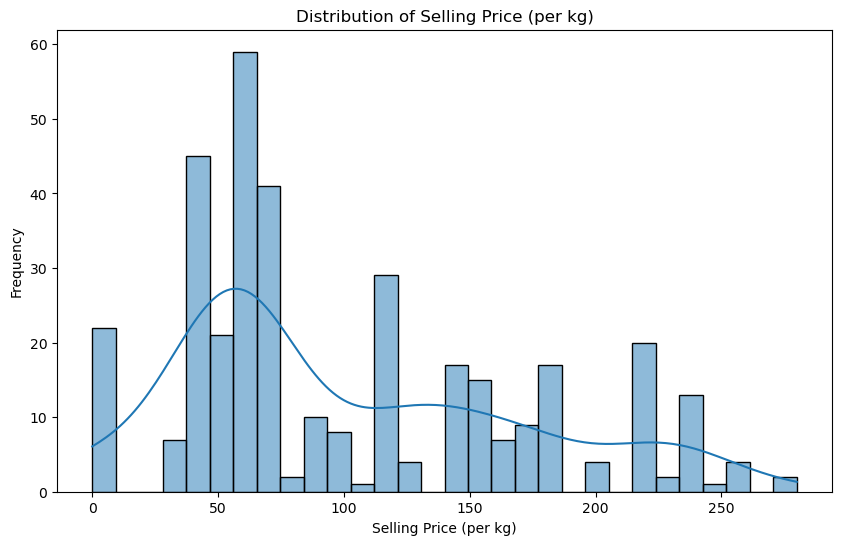

### ii. Distribution of Quantity Sold

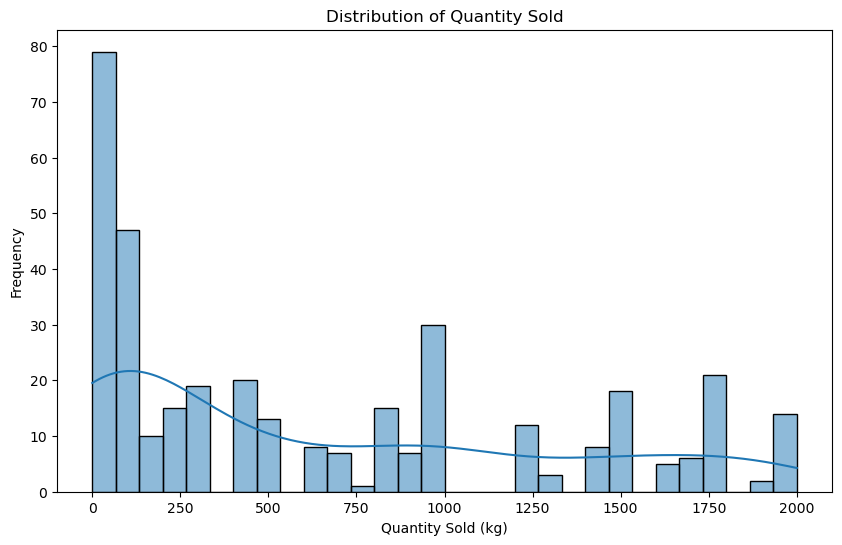

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(df['SOLD_QUANTITY'], bins=30, kde=True)
plt.title('Distribution of Quantity Sold')
plt.xlabel('Quantity Sold (kg)')
plt.ylabel('Frequency')
plt.show()

## Bivariate Analysis - Analyze relationships between pairs of columns.

### i. Relationship between Selling Price and Quantity Sold

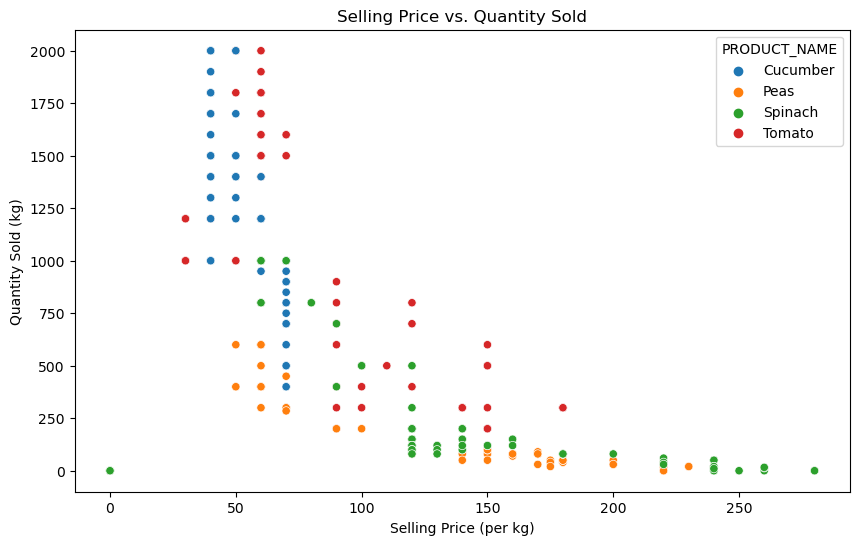

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SELLING_PRICE(per kg)', y='SOLD_QUANTITY', hue='PRODUCT_NAME', data=df)
plt.title('Selling Price vs. Quantity Sold')
plt.xlabel('Selling Price (per kg)')
plt.ylabel('Quantity Sold (kg)')
plt.show()

### ii Relationship between Selling Price and Remaining Quantity

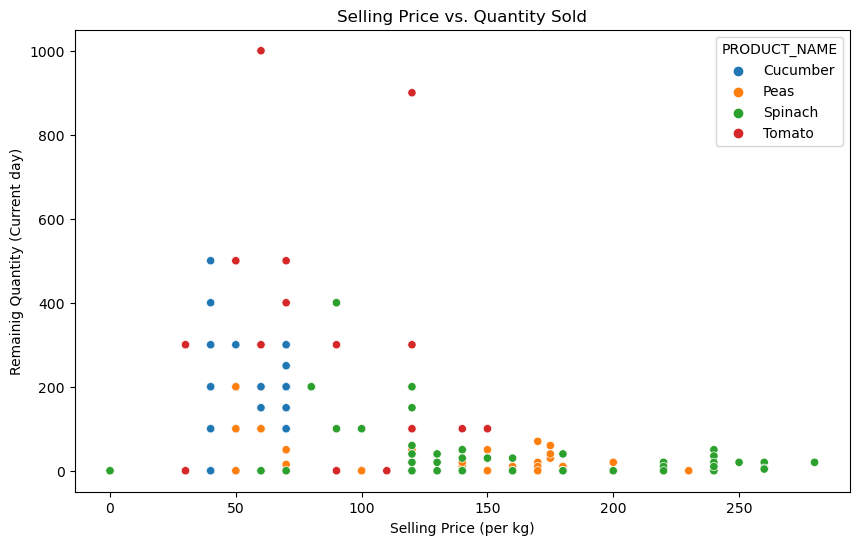

In [46]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SELLING_PRICE(per kg)', y='REMAINING_QUANTITY_CURR', hue='PRODUCT_NAME', data=df)
plt.title('Selling Price vs. Quantity Sold')
plt.xlabel('Selling Price (per kg)')
plt.ylabel('Remainig Quantity (Current day)')
plt.show()

# Time Series Analysis - Analyze trends over time.

## i)  Selling Price Trends Over 3 Months for each vegetables

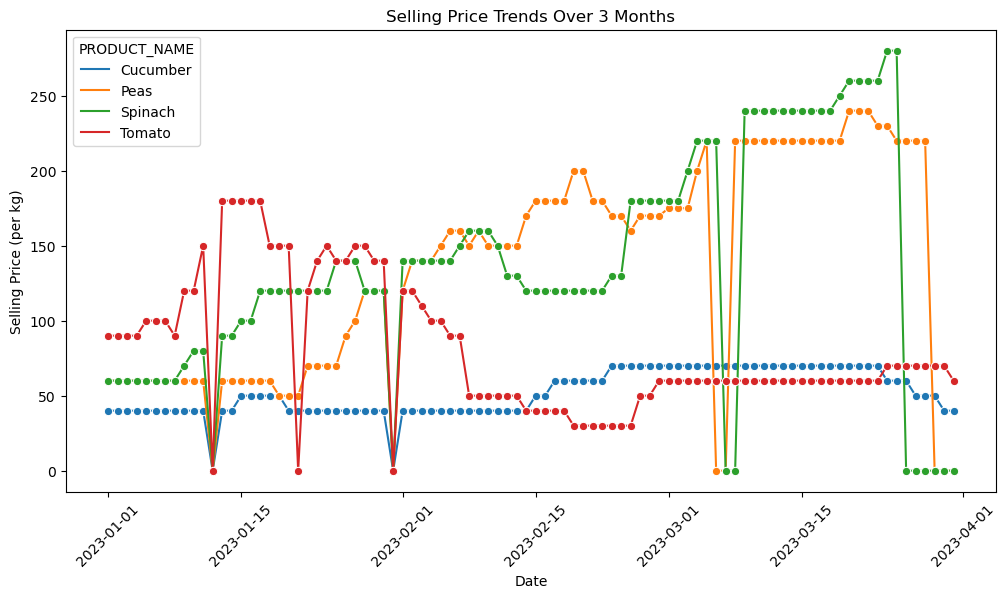

In [47]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='DATE', y='SELLING_PRICE(per kg)', hue='PRODUCT_NAME', marker='o')
plt.title('Selling Price Trends Over 3 Months')
plt.xlabel('Date')
plt.ylabel('Selling Price (per kg)')
plt.xticks(rotation=45)
plt.show()

## Avegrage selling price for each vegetable in months 

### Create a new column 'month' to extract the month from the 'date' column

In [58]:
df['MONTH'] = df['DATE'].dt.month

In [61]:
month_map = {1:'January', 2:'February', 3:'March'}

In [62]:
df['MONTH']= df['MONTH'].map(month_map)

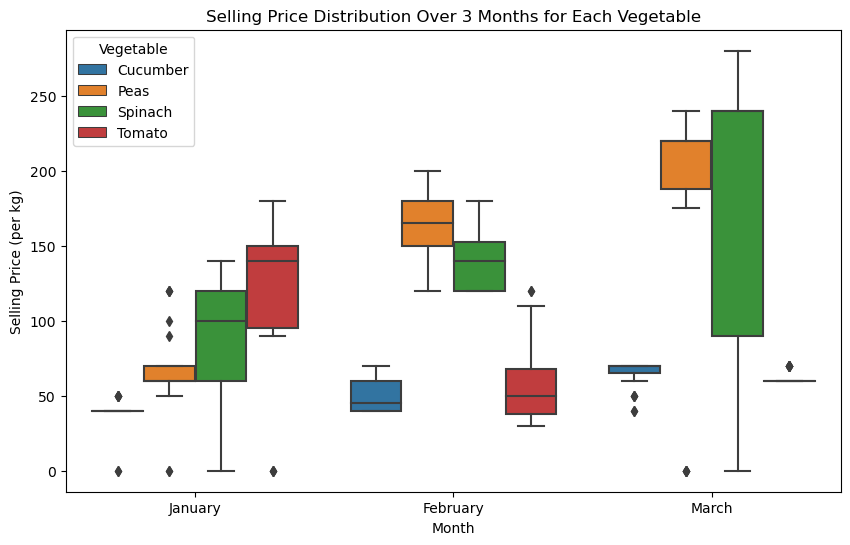

In [68]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='MONTH', y='SELLING_PRICE(per kg)', hue='PRODUCT_NAME')
plt.title('Selling Price Distribution Over 3 Months for Each Vegetable')
plt.xlabel('Month')
plt.ylabel('Selling Price (per kg)')
plt.legend(title='Vegetable')
plt.show()

## ii) Profit percentage for each vegetable

### Create a new column 'Invested_amount' to calculate total invested_amount for each vegetable per day 

In [71]:
df['INVESTED_AMOUNT'] = df['BUYING_RATE(per kg)']*df['QUANTITY(kgs)']

#### Invested amount for each vegetable

In [73]:
df.groupby('PRODUCT_NAME')['INVESTED_AMOUNT'].sum().reset_index()

,PRODUCT_NAME,INVESTED_AMOUNT
0,Cucumber,3654000
1,Peas,962200
2,Spinach,1564200
3,Tomato,4656000


####  Toral amount for each vegetable after sales

In [74]:
df.groupby('PRODUCT_NAME')['PROFIT_LOSS_TOTAL'].sum().reset_index()

,PRODUCT_NAME,PROFIT_LOSS_TOTAL
0,Cucumber,5775700
1,Peas,1006800
2,Spinach,1599500
3,Tomato,5945500


 ### Create a new column 'Profit/Loss_Per_Day' to calculate profit or loss for each vegetable per day 

In [76]:
df['PROFIT/LOSS_PER_DAY'] = df['PROFIT_LOSS_TOTAL']-df['INVESTED_AMOUNT']

####  Profit for each vegetable

In [78]:
df.groupby('PRODUCT_NAME')['PROFIT/LOSS_PER_DAY'].sum().reset_index()

,PRODUCT_NAME,PROFIT/LOSS_PER_DAY
0,Cucumber,2121700
1,Peas,44600
2,Spinach,35300
3,Tomato,1289500


### Percentage of Profit Earned by each vegetable

In [79]:
Profit_by_category = df.groupby('PRODUCT_NAME')['PROFIT/LOSS_PER_DAY'].sum()

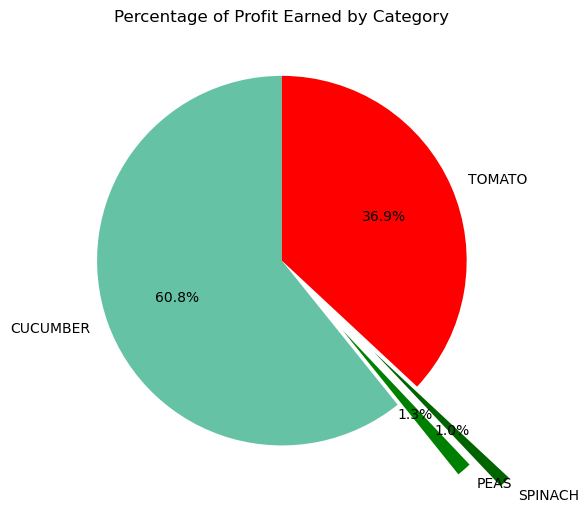

In [83]:
plt.figure(figsize=(10, 6))
plt.pie(Profit_by_category, labels=['CUCUMBER','PEAS','SPINACH','TOMATO'],autopct='%1.1f%%',
        startangle=90,explode=(0,0.5,0.7,0),colors = ['#66c2a5', 'Green', 'darkgreen', 'red'])
plt.title('Percentage of Profit Earned by Category')
plt.show()

## iii) Monthly Profit/Loss for each vegetable

#### Calculating monthly profit/loss for each vegetable per month

In [84]:
monthly_profit = df.groupby(['PRODUCT_NAME','MONTH'])['PROFIT/LOSS_PER_DAY'].sum().reset_index()

In [86]:
pivot_table = monthly_profit.pivot(index='MONTH', columns='PRODUCT_NAME', values='PROFIT/LOSS_PER_DAY')
pivot_table

PRODUCT_NAME,Cucumber,Peas,Spinach,Tomato
MONTH,,,,
February,761200,-41000,-9400,496000
January,883350,165050,116800,37000
March,477150,-79450,-72100,756500


### Monthly Profit/Loss for each vegetable per month 

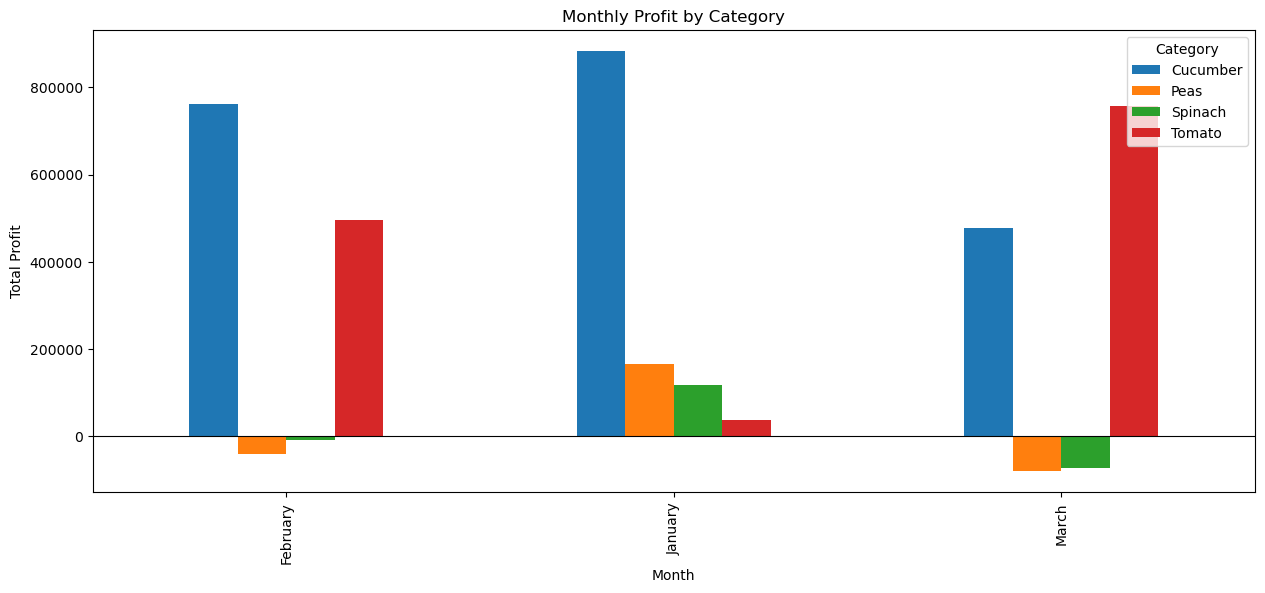

In [93]:
pivot_table.plot(kind='bar', figsize=(15 ,6))
plt.title('Monthly Profit by Category')
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.legend(title='Category')
plt.axhline(0, color='black', linewidth=0.8)  # Add a horizontal line at y=0
plt.show()

### Calculating Average Remaining quantity of vegetable per month

In [94]:
avg_remaining = df.groupby(['PRODUCT_NAME','MONTH'])['REMAINING_QUANTITY_CURR'].mean().reset_index()

In [95]:
avg_remaining

,PRODUCT_NAME,MONTH,REMAINING_QUANTITY_CURR
0,Cucumber,February,117.857143
1,Cucumber,January,54.838710
2,Cucumber,March,109.677419
3,Peas,February,10.714286
4,Peas,January,23.064516
5,Peas,March,8.548387
6,Spinach,February,12.500000
7,Spinach,January,50.322581
8,Spinach,March,7.741935
9,Tomato,February,100.000000


Inventory Trends:

Cucumber: The remaining quantity increased from January to February but decreased slightly in March.

Peas: The remaining quantity decreased from January to February and then decreased further in March.

Spinach: The remaining quantity decreased from January to February and decreased again in March.

Tomato: The remaining quantity increased from January to February and increased further in March, showing a positive trend.¶

### Calculating  Sold quantity of vegetable per month

In [106]:
avg_sold = df.groupby(['PRODUCT_NAME','MONTH'])['SOLD_QUANTITY'].sum().reset_index()

In [107]:
avg_sold

,PRODUCT_NAME,MONTH,SOLD_QUANTITY
0,Cucumber,February,38000
1,Cucumber,January,45600
2,Cucumber,March,29300
3,Peas,February,1920
4,Peas,January,11085
5,Peas,March,545
6,Spinach,February,3220
7,Spinach,January,14940
8,Spinach,March,680
9,Tomato,February,32700


Sales Trends by Month:

Cucumber: Highest sales in January, followed by February and then March.
    
Peas: Highest sales in January, significantly lower sales in February, and the lowest sales in March.
    
Spinach: Highest sales in January, followed by February and then March.
    
Tomato: Highest sales in March, followed by February and then January.

## Calculating profit per day

In [97]:
daily_profit = df.groupby('DATE')['PROFIT/LOSS_PER_DAY'].sum().reset_index()

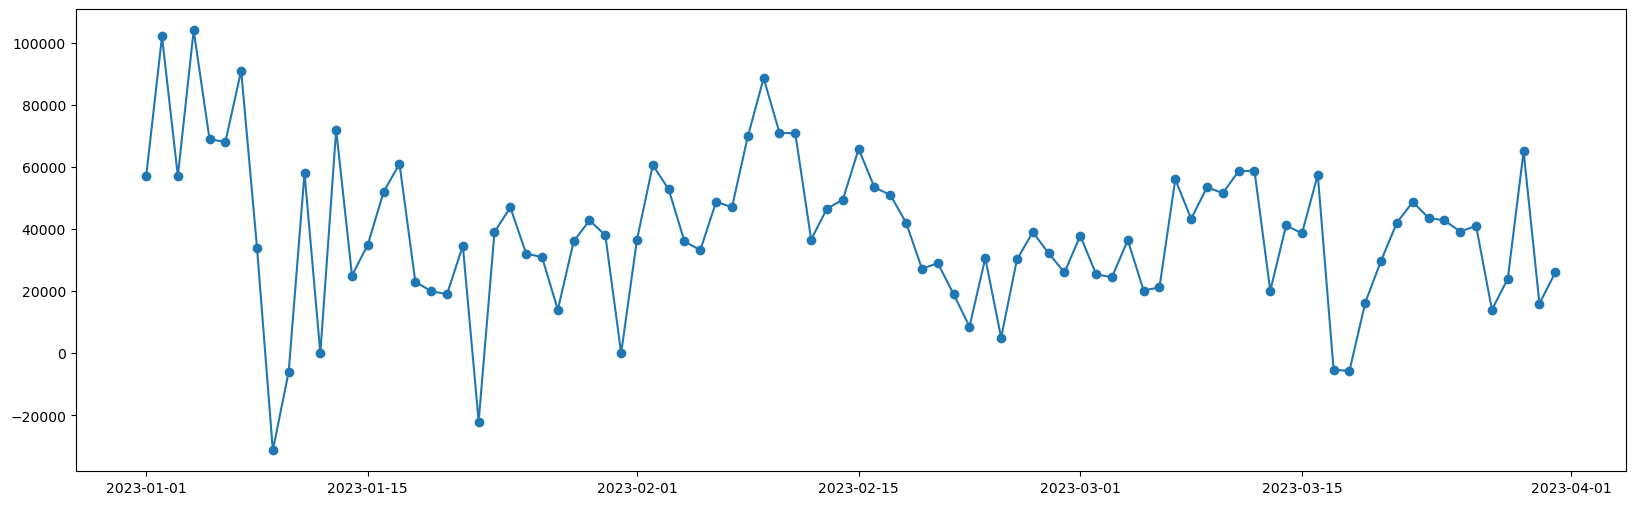

In [99]:
plt.figure(figsize=(20,6))
plt.plot(daily_profit['DATE'], daily_profit['PROFIT/LOSS_PER_DAY'], marker='o', linestyle='-')
plt.show()

##  Correlation Between Selling Price and Remaining Quantity for Current Day

In [100]:
corr = pearsonr(df['SELLING_PRICE(per kg)'],df['REMAINING_QUANTITY_CURR'])
corr

PearsonRResult(statistic=-0.2064509734077289, pvalue=7.943396594275751e-05)


Negative Relationship: The negative sign indicates that as one variable (selling price per kilogram) increases, the other variable (remaining quantity) tends to decrease slightly.

Strength of the Relationship: The correlation coefficient of -0.206 suggests a weak relationship. This means that while there is a tendency for the remaining quantity to decrease as the selling price per kilogram increases, the relationship is not very strong or consistent.

Statistical Significance: The p-value of approximately 7.94e-05 indicates that this weak negative correlation is unlikely to be due to random chance. It suggests that there may be a true but weak relationship between the selling price per kilogram and the remaining quantity of the products.

##  Correlation Between Buying Price and Buying Quantity for Current Day 

In [101]:
corr_2 = pearsonr(df['BUYING_RATE(per kg)'],df['QUANTITY(kgs)'])
corr_2

PearsonRResult(statistic=-0.6827762294722514, pvalue=9.822693847161112e-51)

Inverse Relationship: The negative correlation coefficient (-0.680) suggests that as the buying rate per kilogram increases, the quantity purchased tends to decrease. Conversely, as the buying rate per kilogram decreases, the quantity purchased tends to increase.

Magnitude of the Relationship: The correlation coefficient being relatively close to -1 (-1 indicates a perfect negative correlation) indicates that the relationship is strong. This suggests that changes in the buying rate per kilogram are highly associated with changes in the quantity purchased.

Statistical Significance: The very low p-value (approximately 3.46e-50) indicates that this relationship is highly unlikely to be due to random chance. This suggests that the relationship between the buying rate per kilogram and the quantity purchased is a real and significant one.

Business Implications:

Pricing Strategy: Businesses can use this information to adjust their pricing strategies. For example, if they want to sell more quantity, they might consider reducing the buying rate per kilogram.
Inventory Management: Understanding this relationship can help businesses manage their inventory more effectively, as changes in buying rate per kilogram may have a predictable impact on the quantity purchased.

##  Correlation Between Selling Price and Sold Quantity for Current Day 


In [102]:
corr_3 = pearsonr(df['SELLING_PRICE(per kg)'],df['SOLD_QUANTITY'])
corr_3

PearsonRResult(statistic=-0.5982402016343884, pvalue=2.5562771394474185e-36)

Inverse Relationship: The negative correlation coefficient (-0.598) suggests that as the selling price per kilogram increases, the quantity sold tends to decrease. Conversely, as the selling price per kilogram decreases, the quantity sold tends to increase.

Magnitude of the Relationship: The correlation coefficient being relatively close to -1 (-1 indicates a perfect negative correlation) indicates that the relationship is moderately strong. This suggests that changes in the selling price per kilogram are associated with noticeable changes in the quantity sold.

Statistical Significance: The very low p-value (approximately 2.56e-36) indicates that this relationship is highly unlikely to be due to random chance. This suggests that the relationship between the selling price per kilogram and the quantity sold is a real and significant one.

Business Implications:

Pricing Strategy: Businesses can use this information to adjust their pricing strategies. For example, if they want to increase sales volume, they might consider reducing the selling price per kilogram.

Revenue Optimization: Understanding this relationship can help businesses optimize their revenue by balancing price and quantity sold.

# Report and Insights

The analysis of the sales data revealed several trends and insights that can help in understanding the market dynamics and optimizing business strategies. Here is a brief description of the key trends and insights gathered:

Seasonal Variation: Different vegetables exhibited distinct seasonal sales patterns. For example, Cucumber and Spinach showed peak sales in January, while Peas and Tomato had different peak months (January for Peas and March for Tomato). Understanding these seasonal variations can help businesses plan their production and inventory management accordingly.

Price-Quantity Relationship:

Selling Price vs. Remaining Quantity: A weak negative correlation was observed, indicating that as the selling price per kilogram increased, the remaining quantity tended to decrease slightly.

Buying Rate vs. Quantity: A strong negative correlation was found, suggesting that higher buying rates per kilogram were associated with lower quantities purchased.

Selling Price vs. Sold Quantity: A moderately strong negative correlation was observed, indicating that higher selling prices per kilogram were associated with lower quantities sold.

Sales Trends:

Cucumber had the highest sales in January, followed by February and then March. (Profit Percentage = 60.8%)

Peas had the highest sales in January, significantly lower sales in February, and the lowest sales in March.(Profit Percentage = 1.3)

Spinach had the highest sales in January, followed by February and then March.(Profit Percentage = 1.0%)

Tomato had the highest sales in March, followed by January and then February.(Profit Percentage =36.9%)

Business Implications:

Inventory Management: Businesses can use the sales trends to optimize their inventory management, ensuring they stock more in high-sales months and avoid overstocking in low-sales months.

Pricing Strategy: The price-quantity relationship insights can help businesses adjust their pricing strategies to maximize revenue. For example, reducing prices during peak sales months may increase quantity sold.

Marketing Strategy: Understanding the seasonal variations and sales trends can help in developing targeted marketing campaigns to capitalize on peak sales periods for each vegetable.